Preprocess the data: Tokenize and pad sequences.
Create embeddings: Use word2vec and fastText.
Build models: Define the architectures for the neural network and the CNNs.
Train and evaluate models: Train each model and evaluate its performance

Step 1: Preprocess the Data

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("Dataset.csv")

In [5]:
df.head()

,SL,Emotion,Text,Year,Racial Biases,Hatred Percentage,Depression Percentage
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,2016,NaN,NaN,NaN
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,2016,NaN,NaN,NaN
2,3,angry,ভেজাল নির্বাচন ।,2016,NaN,NaN,NaN
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,2016,NaN,NaN,NaN
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...",2016,NaN,NaN,NaN


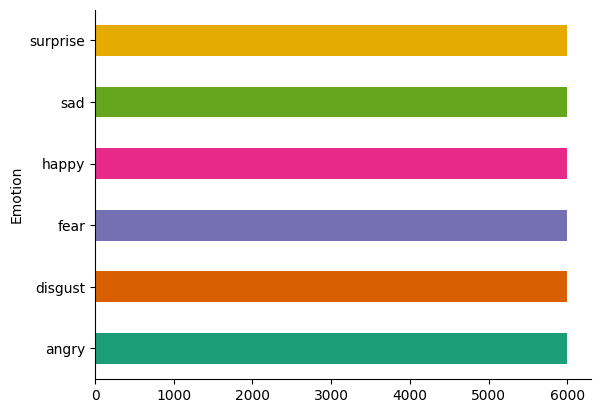

In [6]:
# @title Emotion

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Emotion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
#label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Emotion_label'] = le.fit_transform(df['Emotion'])


In [8]:
#drop Racial biases
df.drop(['Racial Biases'], axis=1, inplace=True)
#drop Hatred Percentage
df.drop(['Hatred Percentage',], axis=1, inplace=True)
#drop Depression Percentage
df.drop(['Depression Percentage'], axis=1, inplace=True)
#drop year
df.drop(['Year'], axis=1, inplace=True)


In [9]:
#data preprocessing using spacy

#removing unnecessary punctuation
import re

# Data cleaning function
def process_comments(Comment):
    Comment = re.sub('[^\u0980-\u09FF]',' ',str(Comment)) #removing unnecessary punctuation
    return Comment

df['Cleaned'] = df['Text'].apply(process_comments)
df.head()


,SL,Emotion,Text,Emotion_label,Cleaned
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,1,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,1,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...
2,3,angry,ভেজাল নির্বাচন ।,0,ভেজাল নির্বাচন
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,3,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...",0,সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল এ...


In [10]:
import pandas as pd

# Load Bengali stop words from a CSV file
stop_words_df = pd.read_csv('stopwords_bangla.csv')  # Assuming the CSV has one column with stop words
stop_words_df=stop_words_df.drop(['Unnamed: 0'], axis=1)
# Convert the stop words to a list
stop_words_list = stop_words_df.iloc[:, 0].tolist()  # Convert the column to a list

# Check the stop words list
print("Stop words list:", stop_words_list[:10])  # Print first 10 stop words for verification


# Function to remove stop words
def remove_stop_words(text, stop_words):
    if isinstance(text, str):  # Ensure the text is a string
        # Tokenize text (simple split for Bengali)
        words = text.split()
        # Filter out stop words
        filtered_words = [word for word in words if word not in stop_words]
        # Join words back into a single string
        return ' '.join(filtered_words)
    else:
        return text  # If text is not a string, return it as is

# Assuming 'df' is the DataFrame and 'Cleaned' is the column with text data
# Check a few entries in the original DataFrame
print("Original texts:", df['Cleaned'].head())

# Apply the function to the DataFrame
df['filtered_text'] = df['Cleaned'].apply(lambda x: remove_stop_words(x, stop_words_list))


df.head()

Stop words list: ['অই', 'অগত্যা', 'অত: পর', 'অতএব', 'অথচ', 'অথবা', 'অধিক', 'অধীনে', 'অধ্যায়', 'অনুগ্রহ']
Original texts: 0    নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...
1    জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...
2                                     ভেজাল নির্বাচন  
3    বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...
4    সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল  এ...
Name: Cleaned, dtype: object


,SL,Emotion,Text,Emotion_label,Cleaned,filtered_text
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,1,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভোট ব...
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,1,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,জনগণ মনের আনন্দে ভোট কাস্ট দেশদ্রোহী পেট্রল বো...
2,3,angry,ভেজাল নির্বাচন ।,0,ভেজাল নির্বাচন,ভেজাল নির্বাচন
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,3,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,বিএনপি রাজাকার সমর্থকরা হেরে দেশের আমিও সন্তুষ...
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...",0,সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল এ...,সূক্ষ্ম কারচুপি এতদিন একটা কথার কথা বাস্তব রূপ...


In [11]:
X = df['filtered_text']

In [12]:
y = df['Emotion_label']

In [13]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from gensim.models import FastText
import numpy as np

# Train FastText model on the training data
fasttext_model = FastText(sentences=x_train, vector_size=100, window=5, min_count=1, workers=4)

# Precompute zero vectors for out-of-vocabulary words
zero_vector = np.zeros(fasttext_model.vector_size)

# Function to convert text to FastText embeddings
def text_to_embedding(text, model, max_length):
    # Initialize embedding array with zeros
    embedding = np.zeros((max_length, model.vector_size))

    # Iterate through words and fill the embedding array
    for i, word in enumerate(text[:max_length]):
        embedding[i] = model.wv[word] if word in model.wv else zero_vector

    return embedding

# Set the maximum sequence length
max_sequence_length = 100

# Convert texts to embeddings
x_train_emb = np.array([text_to_embedding(text, fasttext_model, max_sequence_length) for text in x_train])
x_test_emb = np.array([text_to_embedding(text, fasttext_model, max_sequence_length) for text in x_test])


##simple RNN

In [15]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.layers import Masking

# Define the RNN model
model = Sequential()
model.add(Masking(mask_value=0., input_shape=(max_sequence_length, 100)))
model.add(SimpleRNN(units=128))
model.add(Dense(units= 6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(x_train_emb, y_train, epochs=20, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ masking (Masking)                    │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 128)                 │          29,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,086 (117.52 KB)

 Trainable params: 30,086 (117.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.2583 - loss: 1.7690 - val_accuracy: 0.3734 - val_loss: 1.5938
Epoch 2/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.4198 - loss: 1.5065 - val_accuracy: 0.4661 - val_loss: 1.4255
Epoch 3/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.5223 - loss: 1.2868 - val_accuracy: 0.5153 - val_loss: 1.3064
Epoch 4/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.5962 - loss: 1.1291 - val_accuracy: 0.5693 - val_loss: 1.2064
Epoch 5/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.6454 - loss: 1.0057 - val_accuracy: 0.5974 - val_loss: 1.1588
Epoch 6/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.6754 - loss: 0.9253 - val_accuracy: 0.6090 - val_loss: 1.1379
Epoch 7/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.6887 - loss: 0.8927 - val_accuracy: 0.6217 - val_loss: 1.0980
Epoch 8/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.7020 - loss: 0.8584 - 

In [16]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = np.argmax(model.predict(x_test_emb), axis=1)

# Print classification report
print("Results for RNN with Word2Vec:")
print(classification_report(y_test, y_pred))


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Results for RNN with Word2Vec:
              precision    recall  f1-score   support

           0       0.58      0.62      0.60      1226
           1       0.67      0.76      0.71      1188
           2       0.75      0.79      0.77      1129
           3       0.68      0.66      0.67      1246
           4       0.51      0.42      0.46      1244
           5       0.75      0.74      0.74      1167

    accuracy                           0.66      7200
   macro avg       0.66      0.66      0.66      7200
weighted avg       0.66      0.66      0.66      7200



##RNN(LSTM)

In [17]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Masking, Bidirectional

# Define the BiLSTM model
model = Sequential()
model.add(Masking(mask_value=0., input_shape=(max_sequence_length, 100)))
model.add(Bidirectional(LSTM(units=128, return_sequences=False, recurrent_regularizer='l2', use_bias=False, kernel_initializer='lecun_uniform', implementation=1)))
model.add(Dense(units=6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(x_train_emb, y_train, epochs=10, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ masking_1 (Masking)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 256)                 │         233,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,014 (918.02 KB)

 Trainable params: 235,014 (918.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - accuracy: 0.2205 - loss: 2.1433 - val_accuracy: 0.2759 - val_loss: 1.7140
Epoch 2/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 38s 29ms/step - accuracy: 0.3128 - loss: 1.6830 - val_accuracy: 0.3167 - val_loss: 1.6624
Epoch 3/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.3565 - loss: 1.6175 - val_accuracy: 0.3759 - val_loss: 1.5971
Epoch 4/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - accuracy: 0.4135 - loss: 1.5285 - val_accuracy: 0.4042 - val_loss: 1.5351
Epoch 5/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.4617 - loss: 1.4488 - val_accuracy: 0.4521 - val_loss: 1.4698
Epoch 6/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.5033 - loss: 1.3680 - val_accuracy: 0.4852 - val_loss: 1.4174
Epoch 7/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.5475 - loss: 1.2923 - val_accuracy: 0.5168 - val_loss: 1.3608
Epoch 8/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.5762 - loss: 1.2289 - 

In [18]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = np.argmax(model.predict(x_test_emb), axis=1)

# Print classification report
print("Results for RNN with Word2Vec:")
print(classification_report(y_test, y_pred))


225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Results for RNN with Word2Vec:
              precision    recall  f1-score   support

           0       0.52      0.53      0.53      1226
           1       0.62      0.64      0.63      1188
           2       0.63      0.71      0.67      1129
           3       0.67      0.57      0.61      1246
           4       0.45      0.34      0.39      1244
           5       0.59      0.74      0.65      1167

    accuracy                           0.58      7200
   macro avg       0.58      0.59      0.58      7200
weighted avg       0.58      0.58      0.58      7200



#CNN

In [19]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Embedding, Masking

# Define the CNN model
model = Sequential()
model.add(Masking(mask_value=0., input_shape=(max_sequence_length, 100)))  # Assuming input_shape remains the same

# Add convolutional layer
model.add(Conv1D(filters=128, kernel_size=5, activation='relu', padding='same'))

# Add max pooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add fully connected (Dense) layer
model.add(Dense(units=128, activation='relu'))

# Output layer
model.add(Dense(units=6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(x_train_emb, y_train, epochs=10, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ masking_2 (Masking)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 100, 128)            │          64,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 50, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 884,230 (3.37 MB)

 Trainable params: 884,230 (3.37 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3164 - loss: 1.6510 - val_accuracy: 0.6224 - val_loss: 1.1064
Epoch 2/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7257 - loss: 0.8174 - val_accuracy: 0.7434 - val_loss: 0.8181
Epoch 3/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8576 - loss: 0.4725 - val_accuracy: 0.7845 - val_loss: 0.7811
Epoch 4/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9067 - loss: 0.3230 - val_accuracy: 0.8064 - val_loss: 0.7801
Epoch 5/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9344 - loss: 0.2426 - val_accuracy: 0.8115 - val_loss: 0.7773
Epoch 6/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9506 - loss: 0.1814 - val_accuracy: 0.8047 - val_loss: 0.8952
Epoch 7/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9507 - loss: 0.1740 - val_accuracy: 0.8125 - val_loss: 0.8661
Epoch 8/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9579 - loss: 0.1395 - val_accuracy: 0.

In [20]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = np.argmax(model.predict(x_test_emb), axis=1)

# Print classification report
print("Results for RNN with Word2Vec:")
print(classification_report(y_test, y_pred))


225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Results for RNN with Word2Vec:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1226
           1       0.83      0.85      0.84      1188
           2       0.86      0.87      0.87      1129
           3       0.88      0.79      0.83      1246
           4       0.69      0.71      0.70      1244
           5       0.86      0.89      0.87      1167

    accuracy                           0.81      7200
   macro avg       0.82      0.82      0.82      7200
weighted avg       0.82      0.81      0.82      7200



#CNN+BiLSTM

In [21]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Embedding, Masking, Bidirectional, LSTM

# Define the CNN-BiLSTM model
model = Sequential()

# Masking layer to handle padding
model.add(Masking(mask_value=0., input_shape=(max_sequence_length, 100)))

# Convolutional layers
model.add(Conv1D(filters=128, kernel_size=5, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=128, kernel_size=5, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))

# Bidirectional LSTM layer
model.add(Bidirectional(LSTM(units=128, return_sequences=False, recurrent_regularizer='l2', use_bias=False, kernel_initializer='lecun_uniform', implementation=1)))

# Output layer
model.add(Dense(units=6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(x_train_emb, y_train, epochs=10, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'conv1d_1' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ masking_3 (Masking)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 100, 128)            │          64,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 50, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 50, 128)             │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 25, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 256)                 │         262,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 409,862 (1.56 MB)

 Trainable params: 409,862 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.2477 - loss: 2.1123 - val_accuracy: 0.4747 - val_loss: 1.4015
Epoch 2/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5542 - loss: 1.2222 - val_accuracy: 0.6300 - val_loss: 1.0527
Epoch 3/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.7168 - loss: 0.8293 - val_accuracy: 0.7212 - val_loss: 0.8717
Epoch 4/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8080 - loss: 0.5849 - val_accuracy: 0.7470 - val_loss: 0.8350
Epoch 5/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8554 - loss: 0.4520 - val_accuracy: 0.7720 - val_loss: 0.8100
Epoch 6/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8860 - loss: 0.3631 - val_accuracy: 0.7967 - val_loss: 0.7929
Epoch 7/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9143 - loss: 0.2762 - val_accuracy: 0.7986 - val_loss: 0.8144
Epoch 8/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9237 - loss: 0.2450 - val_a

In [22]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = np.argmax(model.predict(x_test_emb), axis=1)

# Print classification report
print("Results for RNN with Word2Vec:")
print(classification_report(y_test, y_pred))


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Results for RNN with Word2Vec:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1226
           1       0.82      0.85      0.83      1188
           2       0.89      0.85      0.87      1129
           3       0.88      0.80      0.84      1246
           4       0.70      0.71      0.71      1244
           5       0.79      0.88      0.83      1167

    accuracy                           0.81      7200
   macro avg       0.82      0.82      0.82      7200
weighted avg       0.82      0.81      0.81      7200

